In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.shape

(284807, 31)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
sc = StandardScaler()
df['Amount'] = sc.fit_transform(pd.DataFrame(df['Amount']))

In [10]:
df = df.drop(['Time'], axis = 1)

In [11]:
df.shape

(284807, 30)

In [12]:
df.duplicated().any()

True

In [13]:
df=df.drop_duplicates()

In [14]:
df.shape

(275663, 30)

<Axes: ylabel='count'>

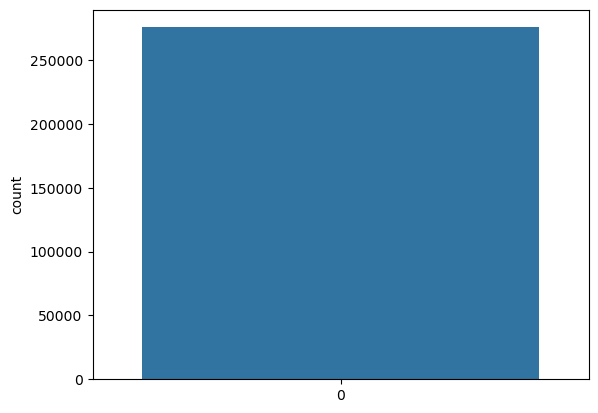

In [15]:
sns.countplot(df['Class'])

In [16]:
# UNDERSAMPLING FOR IMBALANCED DATA
normal = df[df['Class']==0]
fraud = df[df['Class']==1]
fraud.shape

(473, 30)

In [17]:
normal_sample = normal.sample(n=473)
normal_sample.shape

(473, 30)

In [18]:
new_df = pd.concat([normal_sample, fraud])
new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
77971,-1.425250,0.479721,1.891581,-0.989574,-1.118498,-0.002559,-0.121280,0.626001,0.443964,-1.055762,...,-0.066132,-0.258226,-0.167953,0.393231,-0.228118,0.743925,-0.303972,-0.059016,-0.077202,0
242324,-1.272388,-0.442765,0.501852,-0.704962,-1.117990,0.369615,0.919121,0.497914,0.113319,-1.334542,...,0.570929,1.016243,0.587714,-0.327397,-0.334692,0.039991,-0.048063,0.106980,1.008199,0
280862,1.441047,-1.863154,0.454961,0.802743,-1.743141,1.099304,-1.484085,0.550201,2.528202,-0.247088,...,0.219893,0.620695,-0.056329,-0.395756,-0.508947,0.730782,-0.008855,-0.015479,0.563572,0
143358,0.234203,-0.582302,1.639632,-2.191451,-1.585811,-0.608038,-1.035391,-0.924522,-1.928295,0.871355,...,0.695949,-0.140256,-0.204607,0.379144,1.045280,-0.137738,0.141695,0.188383,-0.258875,0
55304,-1.302854,1.903851,0.680696,2.439896,-0.126330,0.948387,-0.485660,1.338858,-1.514412,0.891147,...,-0.142701,-0.610659,0.034662,-0.932124,-0.367329,0.040940,0.245608,0.098453,-0.331320,0


In [19]:
X = new_df.drop('Class', axis = 1)
y = new_df['Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2,
                                                    random_state = 42)

              precision    recall  f1-score   support

           0       0.90      0.94      0.92        88
           1       0.95      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



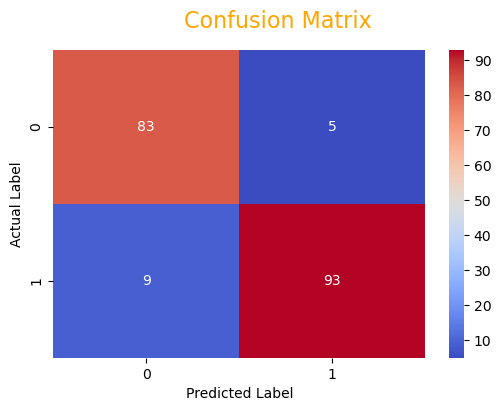

In [45]:
#LOGISTIC REGRESSION ON UNDERSAMPLED DATA
lrmodel = LogisticRegression()
lrmodel.fit(X_train,y_train)
y_pred1 = lrmodel.predict(X_test)
print(classification_report(y_test,y_pred1))
lr1_cm = confusion_matrix(y_test, y_pred1)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(lr1_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       0.90      0.85      0.88        88
           1       0.88      0.92      0.90       102

    accuracy                           0.89       190
   macro avg       0.89      0.89      0.89       190
weighted avg       0.89      0.89      0.89       190



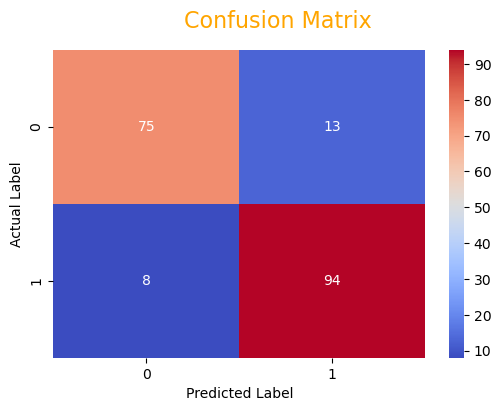

In [46]:
# DECISION TREE CLASSIFIER ON UNDERSAMPLED DATA
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train,y_train)
y_pred2 = dtmodel.predict(X_test)
print(classification_report(y_test,y_pred2))
dt1_cm = confusion_matrix(y_test, y_pred2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(dt1_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



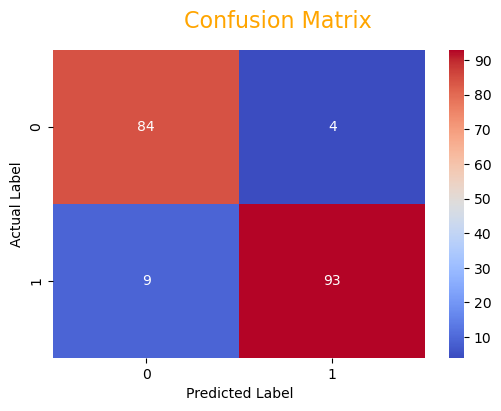

In [54]:
# RANDOM FOREST CLASSIFIER ON UNDERSAMPLED DATA
rfmodel = RandomForestClassifier()
rfmodel.fit(X_train,y_train)
y_pred3 = rfmodel.predict(X_test)
print(classification_report(y_test,y_pred3))
rf1_cm = confusion_matrix(y_test, y_pred3)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(rf1_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        88
           1       0.96      0.91      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



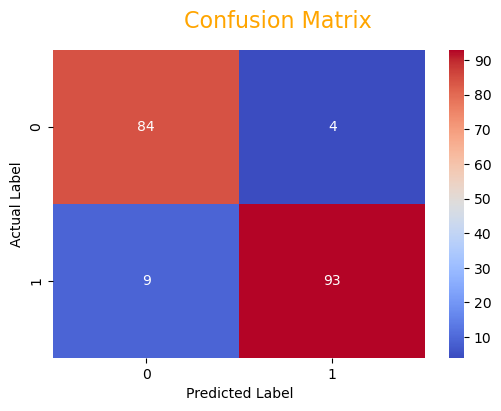

In [59]:
# K NEIGHBORS CLASSIFIER ON UNDERSAMPLED DATA
knmodel = KNeighborsClassifier()
knmodel.fit(X_train,y_train)
y_pred4 = rfmodel.predict(X_test)
print(classification_report(y_test,y_pred4))
kn1_cm = confusion_matrix(y_test, y_pred4)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(kn1_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        88
           1       0.96      0.90      0.93       102

    accuracy                           0.93       190
   macro avg       0.93      0.93      0.93       190
weighted avg       0.93      0.93      0.93       190



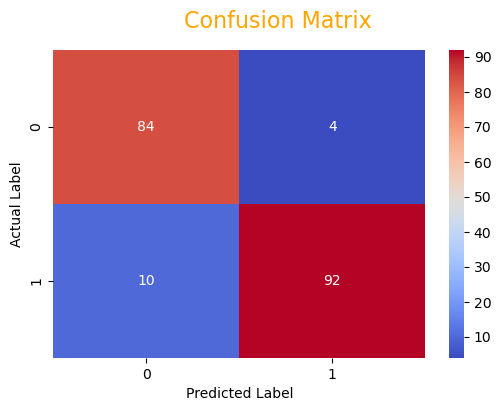

In [61]:
#XGBOOST ON UNDERSAMPLED DATA
xgbmodel = XGBClassifier()
xgbmodel.fit(X_train,y_train)
y_pred5 = xgbmodel.predict(X_test)
print(classification_report(y_test,y_pred5))
xgb1_cm = confusion_matrix(y_test, y_pred5)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(xgb1_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

In [23]:
# OVERSAMPLING THE IMBALANCED DATA
X1 = df.drop('Class', axis = 1)
y1 = df['Class']

In [24]:
X1.shape

(275663, 29)

In [25]:
y1.shape

(275663,)

In [26]:
X_ovr, y_ovr = SMOTE().fit_resample(X1,y1)
y_ovr.shape


(550380,)

In [27]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_ovr,y_ovr,test_size = 0.2,
                                                    random_state = 42)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     55073
           1       0.97      0.91      0.94     55003

    accuracy                           0.94    110076
   macro avg       0.95      0.94      0.94    110076
weighted avg       0.95      0.94      0.94    110076



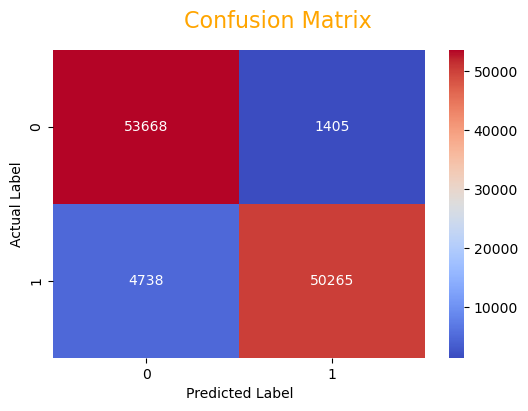

In [49]:
#LOGISTIC REGRESSION ON OVERSAMPLED DATA
lrmodel.fit(X1_train,y1_train)
y1_pred1 = lrmodel.predict(X1_test)
print(classification_report(y1_test,y1_pred1))
lr2_cm = confusion_matrix(y1_test, y1_pred1)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(lr2_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



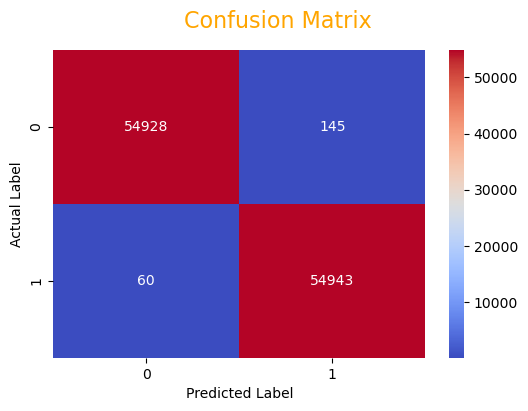

In [50]:
# DECISION TREE CLASSIFIER ON OVERSAMPLED DATA
dtmodel.fit(X1_train,y1_train)
y1_pred2 = dtmodel.predict(X1_test)
print(classification_report(y1_test,y1_pred2))
dt2_cm = confusion_matrix(y1_test, y1_pred2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(dt2_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



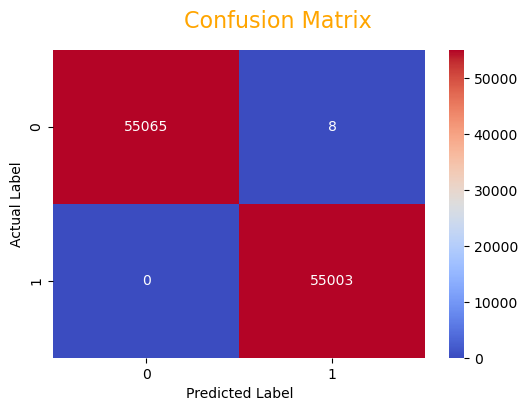

In [69]:
# RANDOM FOREST CLASSIFIER ON OVERSAMPLED DATA
rfmodel = RandomForestClassifier(n_estimators = 500)
rfmodel.fit(X1_train,y1_train)
y1_pred3 = rfmodel.predict(X1_test)
print(classification_report(y1_test,y1_pred3))
rf2_cm = confusion_matrix(y1_test, y1_pred3)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(rf2_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       0.93      0.98      0.95     55073
           1       0.98      0.92      0.95     55003

    accuracy                           0.95    110076
   macro avg       0.95      0.95      0.95    110076
weighted avg       0.95      0.95      0.95    110076



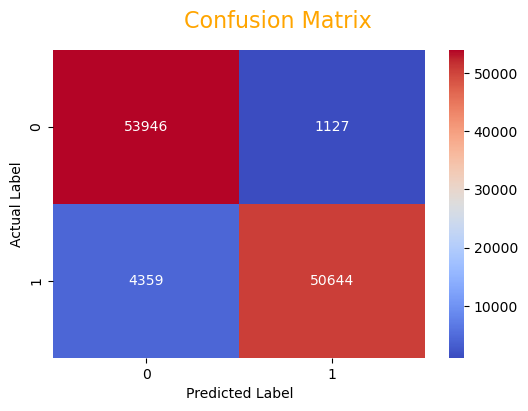

In [57]:
# K NEIGHBORS CLASSIFIER ON OVERSAMPLED DATA
knmodel.fit(X1_train,y1_train)
y1_pred4 = rfmodel.predict(X1_test)
print(classification_report(y1_test,y1_pred4))
kn2_cm = confusion_matrix(y1_test, y1_pred4)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(kn2_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     55073
           1       1.00      1.00      1.00     55003

    accuracy                           1.00    110076
   macro avg       1.00      1.00      1.00    110076
weighted avg       1.00      1.00      1.00    110076



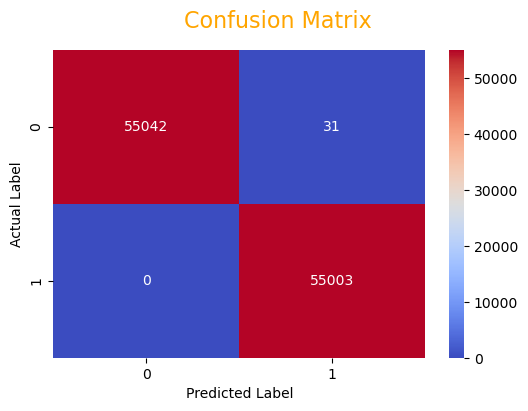

In [62]:
#XGBOOST ON OVERSAMPLED DATA
xgbmodel = XGBClassifier()
xgbmodel.fit(X1_train,y1_train)
y1_pred5 = xgbmodel.predict(X1_test)
print(classification_report(y1_test,y1_pred5))
xgb2_cm = confusion_matrix(y1_test, y1_pred5)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(xgb2_cm, annot=True, cmap='coolwarm', fmt='g')
fig.suptitle(t="Confusion Matrix",color="orange",fontsize=16);
ax.set(xlabel="Predicted Label",ylabel="Actual Label");

In [66]:
# RANDOM FOREST MODEL FOR THE OVERSAMPLED DATA IS THE BEST MODEL

In [68]:
#SAVING THE MODEL
rf = RandomForestClassifier(n_estimators = 500)
rf.fit(X_ovr,y_ovr)

RandomForestClassifier(n_estimators=500)

In [70]:
import joblib
joblib.dump(rf,"credit_card_fraud_model")

['credit_card_fraud_model']